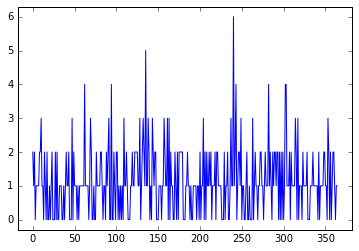

In [867]:
# map(lambda x: int(np.random.binomial(1,x)),[1,.9,.9,.7,.75])
# plt.pcolor(Institution().one_institution_load_for_year()[1])
plt.plot(Institution().one_institution_load_for_year()[1].sum(1))


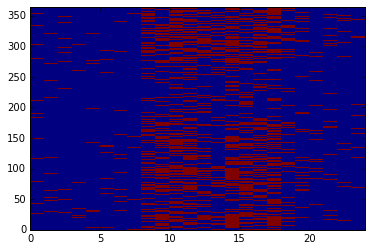

In [699]:


a,b= Workshops().one_workshop_load_for_year()


plt.pcolor(b)
# plt.colorbar()
# plt.plot(b.sum(1))


5 hy 6


In [103]:
import numpy as np
import random
import pandas as pd
from operator import add
import matplotlib.pyplot as plt
import csv,time
import scipy
global timestep 
globaltimestep = 24


def get_month_of_day_of_year(day): # for taking into account seasonal demand

    if 0 <= day <= 31: month = 0 #         January	31
    if 32 <= day <= 58: month = 1#         February	28*
    if 59 <= day <= 89: month = 2#         March	31
    if 90 <= day <= 119: month = 3#         April	30
    if 120 <= day <= 150: month = 4#         May	31
    if 151 <= day <= 180: month = 5#         June	30
    if 181 <= day <= 211: month = 6#         July	31
    if 212 <= day <= 242: month = 7#         August	31
    if 243 <= day <= 272: month = 8#         September	30
    if 273 <= day <= 303: month = 9#         October	31
    if 304 <= day <= 333: month = 10#         November	30
    if day >= 334:  month = 11#         December	31
    return month

class Grid():
    def __init__(self):
        # INPUTS              1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24
        self.p_turned_on = [0.8, 0.8, 0.8, 0.8, 0.1, 0.1, 0.1, 0.1, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.1, 0.1, 0.1, 0.8, 0.8, 0.8, 0.8, 0.8]
        
    def daily_grid_status(self):
        daily_grid_status = map(lambda x: int(np.random.binomial(1,x)),self.p_turned_on)
        return daily_grid_status

    def yearly_grid_status(self):
        yearly_grid_status = []
        for day in range(0,365):
            yearly_grid_status.append(self.daily_grid_status())
        yearly_grid_status = pd.DataFrame(yearly_grid_status)
        return yearly_grid_status

            
class Shop():
    def __init__(self):
        self.average_no_of_lights = 2.78260869565217
        self.average_no_of_lights_stdev = 2.10964283360371

        self.average_no_of_fan = 1.1304347826087
        self.average_no_of_fan_stdev = 1.57550418556574
        
        self.average_no_of_mobile = 1.30434782608696
        self.average_no_of_mobile_stdev = 1.39592858011809
        
        self.average_no_of_laptop = 0.0869565217391304
        self.average_no_of_laptop_stdev = 0.28810406552003
        
        self.average_no_of_fridge = 0.260869565217391
        self.average_no_of_fridge_stdev = 0.540823555863717
        
        self.size = 1

    def no_of_lights(self):
        no_of_lights = abs(np.random.normal(self.average_no_of_lights, self.average_no_of_lights_stdev,self.size))
        return int(no_of_lights)
    def no_of_fan(self):
        no_of_fan = abs(np.random.normal(self.average_no_of_fan, self.average_no_of_fan_stdev,self.size))
        return int(no_of_fan)
    def no_of_mobile(self):
        no_of_mobile = abs(np.random.normal(self.average_no_of_mobile, self.average_no_of_mobile_stdev,self.size))
        return int(no_of_mobile)
    def no_of_laptop(self):
        no_of_laptop = 0#abs(np.random.normal(self.average_no_of_laptop, self.average_no_of_laptop_stdev,self.size))
        return int(no_of_laptop)
    def no_of_fridge(self):
        no_of_fridge = abs(np.random.normal(self.average_no_of_fridge, self.average_no_of_fridge_stdev,self.size))
        return 0#int(no_of_fridge)

    def one_shop_load_for_year(self):
        no_of_lights = self.no_of_lights()
        no_of_fan = self.no_of_fan()
        no_of_mobile = self.no_of_mobile()
        no_of_laptop = self.no_of_laptop()
        no_of_fridge = self.no_of_fridge()
        
        n_of_l,dfLights = self.Light().lights_status_for_year_for_1_shop(no_of_lights)
        n_of_f,dfFan = self.Fan().fan_status_for_year_for_1_shop(no_of_fan)
        n_of_m,dfMobile = self.Mobile().mobile_status_for_year_for_1_shop(no_of_mobile)
        n_of_lp,dfLaptop = self.Laptop().laptop_status_for_year_for_1_shop(no_of_laptop)
        n_of_f,dfFridge = self.Fridge().fridge_status_for_year_for_1_shop(no_of_fridge)
        return n_of_l,dfLights,n_of_f,dfFan,n_of_m,dfMobile,n_of_lp,dfLaptop,n_of_f,dfFridge
    
    class Mobile():

        def __init__(self):
            # probability to turn on mobile
            self.hr_to_charge = 4 #time for charging
            average_charges_per_week = 3.0
            p_charge_per_day = average_charges_per_week/7
            waking_hour = 18
            self.p_mobile_on  = p_charge_per_day/waking_hour


        def daily_mobile_status(self):#
            daily_mobile_turned_on = np.random.binomial(1,self.p_mobile_on, 24)
            daily_mobile_status = [0 for i in range(24)]
            timestep = 0
            while timestep < 24:
                if daily_mobile_turned_on[timestep] == 1: 
                    if timestep + self.hr_to_charge < 24:
                        daily_mobile_status[timestep:timestep+ self.hr_to_charge] = [1 for i in range(timestep,timestep+ self.hr_to_charge)]
                        timestep = timestep + self.hr_to_charge 
                    else:
                        if timestep == 23:
                            daily_mobile_status[23] = 1 
                            timestep = 23
                        if timestep == 22:
                            daily_mobile_status[22:24] = [1,1]
                            timestep = 24
                        if timestep  == 21:
                            daily_mobile_status[21:24] = [1,1,1]
                            timestep = 24

                timestep += 1
            return daily_mobile_status

        def mobile_status_for_year_for_1_shop(self,*args):
            if args: 
                no_of_m = args[0]
            else: 
                no_of_m = int(Shop().no_of_mobile())
            multiple_mobiles_year_status = pd.DataFrame(np.zeros((365,24)))
            for mobile in range(no_of_m):
                year_mobile_status = []
                for day_of_year in range(0,365):    
                    year_mobile_status.append(self.daily_mobile_status())
    #             print pd.DataFrame(year_mobile_status)
                multiple_mobiles_year_status = multiple_mobiles_year_status + pd.DataFrame(year_mobile_status)
            return no_of_m,multiple_mobiles_year_status
    
    class Light():  
        def __init__(self):
            self.rating = 5
            self.size = 1
            # INPUTS              1,   2,  3,    4,   5,   6,   7, 8, 9,   10, 11,  12, 13,14,15, 16, 17, 18,   19, 20,  21,  22,  23,  24
            self.p_turned_on = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0, 0, 0, 0, 0,0.2,0.2, 0.4, 0.6, 0.8 , 0.7,0.4, 0.2,0.05]
            self.season_light_factor = [1.149,1.051,1.013,.947,.899,.876,.886,.926,.982,1.099,1.126,1.167]

        def daily_light_status(self,month):
            p_turned_on_season_adjusted =  map(lambda x: x*self.season_light_factor[month],self.p_turned_on)
            count = 0
            for n in p_turned_on_season_adjusted:
                if n > 0.99: p_turned_on_season_adjusted[count] = 0.99 
                count +=1
            daily_light_status = map(lambda x: int(np.random.binomial(1,x)),p_turned_on_season_adjusted)
            return daily_light_status
    
        def lights_status_for_year_for_1_shop(self,*args):
            if args: 
                no_of_l = args[0]
            else: 
                no_of_l = int(Shop().no_of_lights())
            multiple_lights_year_status = pd.DataFrame(np.zeros((365,24)))
            for lights in range(no_of_l):
                yearly_light_status = []
                for day in range(0,365):
                    month = get_month_of_day_of_year(day)
                    yearly_light_status.append(self.daily_light_status(month))
                multiple_lights_year_status = multiple_lights_year_status + pd.DataFrame(yearly_light_status)
            return no_of_l,multiple_lights_year_status
        
    class Fan():
        def __init__(self):
            # INPUTS               1,    2,    3,    4,    5,    6,    7,    8,   9,   10,  11,  12,   13,  14, 15,   16,  17,  18, 19,   20,  21, 22,  23,   24
            self.p_turned_on = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.5, 0.6, 0.5, 0.5, 0.5, 0.6, 0.6, 0.6, 0.6, 0.5, 0.4, 0.3,0.1, 0.05, 0.05]
            # data from http://www.worldweatheronline.com/bahraich-weather-averages/uttar-pradesh/in.aspx
            # high = [19,19,21,27,30,29,23,24,23,29,28,25]  # temp
            # low =  [8,10,13,20,25,25,26,24,23,22,17,14] # temp
            # rain = np.array([6, 10, 13, 10,3,14,20,22,20,12,3,7]) # no. of days of rain in a month
            # average = np.array(map(lambda x: x/2, map(add, high, low)))
            # t = map(lambda x: (x-average.mean())/average.mean(),average)
            # r = map(lambda x: -(x-rain.mean())/rain.mean(),rain)
            # plt.plot(t,color='g')
            # plt.plot(r,color='y')
            # season_fan_factor = map(add,t,r,)
            # # plt.plot(season_fan_factor,color='pink')
            # count = 0
            # print season_fan_factor
            # for n in season_fan_factor:
            #     if season_fan_factor[count] < 0 :
            #         season_fan_factor[count] = 1+n
            #     count +=1
            # season_fan_factor
            high = [22,19,19,21,27,30,29,23,24,23,29,28,25,22]  # temp
            low =  [11,8,10,13,20,25,25,26,24,23,22,17,14,11] # temp
            rain = np.array([6,6, 10, 13, 10,3,14,20,22,20,12,3,7,6]) # no. of days of rain in a month
            average = np.array(map(lambda x: x/2, map(add, high, low)))
            rain_influence_factor = 0.4
            t = map(lambda x: (x-float(average.min()))/(average.max()-average.min()),average)
            # r = map(lambda x: -(x-float(rain.min()))/(rain.max()-rain.min()),rain)
            r = map(lambda x: -(np.random.binomial(30,(x/30.0),1)/30.0)*rain_influence_factor,rain)
            self.p_rain = map(lambda x: -x,r)
            temp_only_adj_factor = t
            season_fan_factor = map(lambda x: abs(x[0]),map(add,t,r))
            season_fan_factor_midday_of_month = [0,
                                                0+14, #         January	31
                                                31+14,#        February	28*
                                                58+14,#         March	31
                                                90+14,#         April	30
                                                119+14,#         May	31
                                                150+14,#         June	30
                                                180+14,#         July	31
                                                211+14,#         August	31
                                                242+14,#         September	30
                                                272+14,#         October	31
                                                303+14,#         November	30
                                                334+14,#         December	31
                                                364]
            self.daily_season_fan_factor = scipy.interp(range(0,365),season_fan_factor_midday_of_month,season_fan_factor)
            self.daily_temp_only_adj_factor = scipy.interp(range(0,365),season_fan_factor_midday_of_month,temp_only_adj_factor)
#             self.season_fan_factor = [0.090365448504983403, 0.79401993355481726, 0.67641196013289029, 0.21262458471760792, 0.99867109634551499, 0.055813953488372037, 0.40199335548172743, 0.23056478405315606, 0.35548172757475072, 0.13421926910298998, 0.7661129568106313, 0.28372093023255812]    # for one light in a Shop  
        def daily_fan_status(self,day):
            month = get_month_of_day_of_year(day)
            if np.random.binomial(1,self.p_rain[month]) == 1: 
                p_turned_on_season_adjusted =  map(lambda x: x*self.daily_season_fan_factor[day],self.p_turned_on)
            else:
                p_turned_on_season_adjusted = map(lambda x: x*self.daily_temp_only_adj_factor[day],self.p_turned_on)
            count = 0
            for n in p_turned_on_season_adjusted:
                if n > 0.99: p_turned_on_season_adjusted[count] = 0.99 
                count +=1
            daily_fan_status = map(lambda x: int(np.random.binomial(1,x)),p_turned_on_season_adjusted)
            return daily_fan_status
    
        def fan_status_for_year_for_1_shop(self,*args):
            if args: 
                no_of_f = args[0]
            else: 
                no_of_f = int(Shop().no_of_fan())
            multiple_fans_year_status = pd.DataFrame(np.zeros((365,24)))
            for fan in range(no_of_f):
                yearly_fan_status = []
                for day in range(0,365):
                    yearly_fan_status.append(self.daily_fan_status(day))
                multiple_fans_year_status= multiple_fans_year_status+ pd.DataFrame(yearly_fan_status)
            return no_of_f, multiple_fans_year_status
        
        
    class Laptop():
        def __init__(self):
            # INPUTS               1,    2,    3,    4,    5,    6,    7,    8,   9,  10,  11,  12,   13,  14, 15,   16,  17,  18, 19,    20,  21,  22,  23,   24
            self.p_turned_on = [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.3, 0.6, 0.6, 0.5, 0.5, 0.5, 0.6, 0.6, 0.6, 0.5, 0.5, 0.5 , 0.3,0.05, 0.01, 0.01]
             
        def daily_laptop_status(self):
            daily_laptop_status = map(lambda x: int(np.random.binomial(1,x)),self.p_turned_on)
            return daily_laptop_status
    
        def laptop_status_for_year_for_1_shop(self,*args):
            if args: 
                no_of_lp = args[0]
            else: 
                no_of_lp = int(Shop().no_of_laptop())
            multiple_laptop_year_status = pd.DataFrame(np.zeros((365,24)))
            for fan in range(no_of_lp):
                yearly_laptop_status = []
                for day in range(0,365):
                    yearly_laptop_status.append(self.daily_laptop_status())
                multiple_laptop_year_status= multiple_laptop_year_status+ pd.DataFrame(yearly_laptop_status)
            return no_of_lp, multiple_laptop_year_status
        
    class Fridge():
        def __init__(self):
            # INPUTS        
            self.p_turned_on = 0.4 # duty cycle
            # # data from http://www.worldweatheronline.com/bahraich-weather-averages/uttar-pradesh/in.aspx
            # high = [19,19,21,27,30,29,23,24,23,29,28,25]  # temp
            # low =  [8,10,13,20,25,25,26,24,23,22,17,14] # temp

            # average = np.array(map(lambda x: x/2, map(add, high, low)))
            # t = map(lambda x: (x-average.mean())/average.mean(),average)
            # plt.plot(t,color='g')
            # season_fan_factor = t

            # count = 0
            # print season_fan_factor
            # season_fan_factor = np.array(season_fan_factor)
            # normalised = (season_fan_factor -season_fan_factor.min())/(season_fan_factor.max()-season_fan_factor.min())
            # season_fan_factor = normalised
            self.season_fridge_factor = [ 0.05, 0.07142857,  0.28571429,  0.71428571,0.09, 0.09, 0.78571429 , 0.78571429 , 0.71428571 , 0.85714286 , 0.64285714  ,0.42857143]

        def daily_fridge_status(self,month):
            p_turned_on_season_adjusted = self.season_fridge_factor[month]*self.p_turned_on
            if p_turned_on_season_adjusted> 0.99:p_turned_on_season_adjusted  = 0.99 
            daily_fridge_status = np.random.binomial(1,p_turned_on_season_adjusted,24)
            return daily_fridge_status

        def fridge_status_for_year_for_1_shop(self,*args):
            if args: 
                no_of_fdg = args[0]
            else: 
                no_of_fdg = int(Shop().no_of_fridge())
            multiple_fridge_year_status = pd.DataFrame(np.zeros((365,24)))
            for fan in range(no_of_fdg):
                yearly_fridge_status = []
                for day in range(0,365):
                    month = get_month_of_day_of_year(day)
                    yearly_fridge_status.append(self.daily_fridge_status(month))
                multiple_fridge_year_status= multiple_fridge_year_status+ pd.DataFrame(yearly_fridge_status)
            return no_of_fdg, multiple_fridge_year_status
            

class House():
    def __init__(self):
        self.average_no_of_lights = 4.1
        self.average_no_of_lights_stdev = 3

        self.average_no_of_mobile = 1.5
        self.average_no_of_mobile_stdev = 1.6151457
        
        self.average_no_of_fan = 0.625
        self.average_no_of_fan_stdev = 1.20911394
        
        self.average_no_of_laptop = 0.0416666666666667
        self.average_no_of_laptop_stdev =0.2041
        
        self.average_no_of_fridge = 0.25000000000000
        self.average_no_of_fridge_stdev = 0.6757
        
        self.size=1

    def no_of_lights(self):
        lights = abs(np.random.normal(self.average_no_of_lights, self.average_no_of_lights_stdev,self.size))
        return int(lights)
    
    def no_of_mobile(self):
        mobile = abs(np.random.normal(self.average_no_of_mobile, self.average_no_of_mobile_stdev,self.size))
        return int(mobile)
    def no_of_fan(self):
        fan = abs(np.random.normal(self.average_no_of_fan, self.average_no_of_fan_stdev,self.size))
        return int(fan)
    def no_of_laptop(self):
        no_of_laptop = abs(np.random.normal(self.average_no_of_laptop, self.average_no_of_laptop_stdev,self.size))
        return 0#int(no_of_laptop)
    def no_of_fridge(self):
        no_of_fridge = abs(np.random.normal(self.average_no_of_fridge, self.average_no_of_fridge_stdev,self.size))
        return 0#int(no_of_fridge)
        
    def one_house_load_for_year(self):
        no_of_lights = self.no_of_lights()
        no_of_mobile = self.no_of_mobile()
        no_of_fan = self.no_of_fan()
        no_of_laptop = self.no_of_laptop()
        no_of_fridge = self.no_of_fridge()
        n_of_l,dfLights = self.Light().lights_status_for_year_for_1_house(no_of_lights)
        n_of_m,dfMobile = self.Mobile().mobile_status_for_year_for_1_house(no_of_mobile)
        n_of_f,dfFan = self.Fan().fan_status_for_year_for_1_house(no_of_fan)
        n_of_lp,dfLaptop = self.Laptop().laptop_status_for_year_for_1_house(no_of_laptop)
        n_of_f,dfFridge = self.Fridge().fridge_status_for_year_for_1_house(no_of_fridge)
        return n_of_l,dfLights,n_of_m,dfMobile,n_of_f,dfFan,n_of_lp,dfLaptop,n_of_f,dfFridge
    
    class Light():  

        def __init__(self):
            # INPUTS               1,    2,  3,     4,   5,   6,  7,     8,   9,  10,     11,  12,    13,  14,   15,  16,  17,  18, 19,  20,  21,  22,  23,  24
            self.p_turned_on = [0.4, 0.4, 0.4, 0.5, 0.6, 0.5, 0.2, 0.05, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,0.05,0.1, 0.2, 0.6, 0.8, 0.7,0.7, 0.6,0.4]
            self.season_light_factor = [1.149,1.051,1.013,.947,.899,.876,.886,.926,.982,1.099,1.126,1.167]
            
        def daily_light_status(self,month):
            p_turned_on_season_adjusted =  map(lambda x: x*self.season_light_factor[month],self.p_turned_on)
            count = 0
            for n in p_turned_on_season_adjusted:
                if n > 0.99: p_turned_on_season_adjusted[count] = 0.99 
                count +=1
            daily_light_status = map(lambda x: int(np.random.binomial(1,x)),p_turned_on_season_adjusted)
            return daily_light_status
    
        def lights_status_for_year_for_1_house(self,*args):
            if args: 
                no_of_l = args[0]
            else: 
                no_of_l = int(House().no_of_lights())
            multiple_lights_year_status = pd.DataFrame(np.zeros((365,24)))
            for lights in range(no_of_l):
                yearly_light_status = []
                for day in range(0,365):
                    month = get_month_of_day_of_year(day)
                    yearly_light_status.append(self.daily_light_status(month))
                multiple_lights_year_status = multiple_lights_year_status + pd.DataFrame(yearly_light_status)
            return no_of_l,multiple_lights_year_status
    
    class Mobile():

        def __init__(self):
            # probability to turn on mobile
            self.hr_to_charge = 4 #time for charging
            average_charges_per_week = 3.0
            p_charge_per_day = average_charges_per_week/7
            waking_hour = 18
            self.p_mobile_on  = p_charge_per_day/waking_hour


        def daily_mobile_status(self):#
            daily_mobile_turned_on = np.random.binomial(1,self.p_mobile_on, 24)
            daily_mobile_status = [0 for i in range(24)]
            timestep = 0
            while timestep < 24:
                if daily_mobile_turned_on[timestep] == 1: 
                    if timestep + self.hr_to_charge < 24:
                        daily_mobile_status[timestep:timestep+ self.hr_to_charge] = [1 for i in range(timestep,timestep+ self.hr_to_charge)]
                        timestep = timestep + self.hr_to_charge 
                    else:
                        if timestep == 23:
                            daily_mobile_status[23] = 1 
                            timestep = 23
                        if timestep == 22:
                            daily_mobile_status[22:24] = [1,1]
                            timestep = 24
                        if timestep  == 21:
                            daily_mobile_status[21:24] = [1,1,1]
                            timestep = 24

                timestep += 1
            return daily_mobile_status

        def mobile_status_for_year_for_1_house(self,*args):
            if args: 
                no_of_m = args[0]
            else: 
                no_of_m = int(Shop().no_of_mobile())
            multiple_mobiles_year_status = pd.DataFrame(np.zeros((365,24)))
            for mobile in range(no_of_m):
                year_mobile_status = []
                for day_of_year in range(0,365):    
                    year_mobile_status.append(self.daily_mobile_status())
    #             print pd.DataFrame(year_mobile_status)
                multiple_mobiles_year_status = multiple_mobiles_year_status + pd.DataFrame(year_mobile_status)
            return no_of_m,multiple_mobiles_year_status
        
    class Fan():
        def __init__(self):
            # INPUTS            1,     2,  3,    4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,   21,  22,  23,   24
            self.p_turned_on = [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.5, 0.6, 0.7, 0.6, 0.6, 0.6, 0.6, 0.6, 0.5, 0.5, 0.6, 0.6 , 0.6, 0.6, 0.5, 0.5]
#             self.season_fan_factor = [0.090365448504983403, 0.79401993355481726, 0.67641196013289029, 0.21262458471760792, 0.99867109634551499, 0.055813953488372037, 0.40199335548172743, 0.23056478405315606, 0.35548172757475072, 0.13421926910298998, 0.7661129568106313, 0.28372093023255812]     
            high = [22,19,19,21,27,30,29,23,24,23,29,28,25,22]  # temp
            low =  [11,8,10,13,20,25,25,26,24,23,22,17,14,11] # temp
            rain = np.array([6,6, 10, 13, 10,3,14,20,22,20,12,3,7,6]) # no. of days of rain in a month
            average = np.array(map(lambda x: x/2, map(add, high, low)))
            rain_influence_factor = 0.4
            t = map(lambda x: (x-float(average.min()))/(average.max()-average.min()),average)
            # r = map(lambda x: -(x-float(rain.min()))/(rain.max()-rain.min()),rain)
            r = map(lambda x: -(np.random.binomial(30,(x/30.0),1)/30.0)*rain_influence_factor,rain)
            self.p_rain = map(lambda x: -x,r)
            temp_only_adj_factor = t
            season_fan_factor = map(lambda x: abs(x[0]),map(add,t,r))
            season_fan_factor_midday_of_month = [0,
                                                0+14, #         January	31
                                                31+14,#        February	28*
                                                58+14,#         March	31
                                                90+14,#         April	30
                                                119+14,#         May	31
                                                150+14,#         June	30
                                                180+14,#         July	31
                                                211+14,#         August	31
                                                242+14,#         September	30
                                                272+14,#         October	31
                                                303+14,#         November	30
                                                334+14,#         December	31
                                                364]
            self.daily_season_fan_factor = scipy.interp(range(0,365),season_fan_factor_midday_of_month,season_fan_factor)
            self.daily_temp_only_adj_factor = scipy.interp(range(0,365),season_fan_factor_midday_of_month,temp_only_adj_factor)
        def daily_fan_status(self,day):
            month = get_month_of_day_of_year(day)
            if np.random.binomial(1,self.p_rain[month]) == 1: 
                p_turned_on_season_adjusted =  map(lambda x: x*self.daily_season_fan_factor[day],self.p_turned_on)
            else:
                p_turned_on_season_adjusted = map(lambda x: x*self.daily_temp_only_adj_factor[day],self.p_turned_on)
            count = 0
            for n in p_turned_on_season_adjusted:
                if n > 0.99: p_turned_on_season_adjusted[count] = 0.99 
                count +=1
            daily_fan_status = map(lambda x: int(np.random.binomial(1,x)),p_turned_on_season_adjusted)
            return daily_fan_status
    
        def fan_status_for_year_for_1_house(self,*args):
            if args: 
                no_of_f = args[0]
            else: 
                no_of_f = int(House().no_of_fan())
            multiple_fans_year_status = pd.DataFrame(np.zeros((365,24)))
            for fan in range(no_of_f):
                yearly_fan_status = []
                for day in range(0,365):
                    yearly_fan_status.append(self.daily_fan_status(day))
                multiple_fans_year_status= multiple_fans_year_status+ pd.DataFrame(yearly_fan_status)
            return no_of_f, multiple_fans_year_status
        
    class Laptop():
        def __init__(self):
            # INPUTS               1,    2,    3,    4,    5,    6,    7,    8,   9,  10,  11,  12,   13,  14, 15,   16,  17,  18, 19,    20,  21,  22,  23,   24
            self.p_turned_on = [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.3, 0.6, 0.6, 0.5, 0.5, 0.5, 0.6, 0.6, 0.6, 0.5, 0.5, 0.5 , 0.3,0.05, 0.01, 0.01]
             
        def daily_laptop_status(self):
            daily_laptop_status = map(lambda x: int(np.random.binomial(1,x)),self.p_turned_on)
            return daily_laptop_status
    
        def laptop_status_for_year_for_1_house(self,*args):
            if args: 
                no_of_lp = args[0]
            else: 
                no_of_lp = int(Shop().no_of_laptop())
            multiple_laptop_year_status = pd.DataFrame(np.zeros((365,24)))
            for fan in range(no_of_lp):
                yearly_laptop_status = []
                for day in range(0,365):
                    yearly_laptop_status.append(self.daily_laptop_status())
                multiple_laptop_year_status= multiple_laptop_year_status+ pd.DataFrame(yearly_laptop_status)
            return no_of_lp, multiple_laptop_year_status
        
    class Fridge():
        def __init__(self):
            # INPUTS        
            self.p_turned_on = 0.4 # duty cycle
            # # data from http://www.worldweatheronline.com/bahraich-weather-averages/uttar-pradesh/in.aspx
            # high = [19,19,21,27,30,29,23,24,23,29,28,25]  # temp
            # low =  [8,10,13,20,25,25,26,24,23,22,17,14] # temp

            # average = np.array(map(lambda x: x/2, map(add, high, low)))
            # t = map(lambda x: (x-average.mean())/average.mean(),average)
            # plt.plot(t,color='g')
            # season_fan_factor = t

            # count = 0
            # print season_fan_factor
            # season_fan_factor = np.array(season_fan_factor)
            # normalised = (season_fan_factor -season_fan_factor.min())/(season_fan_factor.max()-season_fan_factor.min())
            # season_fan_factor = normalised
            self.season_fridge_factor = [ 0.05, 0.07142857,  0.28571429,  0.71428571,0.09, 0.09, 0.78571429 , 0.78571429 , 0.71428571 , 0.85714286 , 0.64285714  ,0.42857143]

        def daily_fridge_status(self,month):
            p_turned_on_season_adjusted = self.season_fridge_factor[month]*self.p_turned_on
            if p_turned_on_season_adjusted> 0.99:p_turned_on_season_adjusted  = 0.99 
            daily_fridge_status = np.random.binomial(1,p_turned_on_season_adjusted,24)
            return daily_fridge_status

        def fridge_status_for_year_for_1_house(self,*args):
            if args: 
                no_of_fdg = args[0]
            else: 
                no_of_fdg = int(Shop().no_of_fridge())
            multiple_fridge_year_status = pd.DataFrame(np.zeros((365,24)))
            for fan in range(no_of_fdg):
                yearly_fridge_status = []
                for day in range(0,365):
                    month = get_month_of_day_of_year(day)
                    yearly_fridge_status.append(self.daily_fridge_status(month))
                multiple_fridge_year_status= multiple_fridge_year_status+ pd.DataFrame(yearly_fridge_status)
            return no_of_fdg, multiple_fridge_year_status
        
class Mill():
    def __init__(self):
        self.size = 1
        self.average_no_of_engines = 2
        self.average_no_of_engines_stdev  =1
    
    def no_of_engines(self):
        no_of_engines = abs(np.random.normal(self.average_no_of_engines, self.average_no_of_engines_stdev,self.size))
        no_of_engines = 2
        return int(no_of_engines)
    
    def one_mill_load_for_year(self):
        no_of_engines = self.no_of_engines()
        no_of_e,dfMill = self.Engines().engines_status_for_year_for_1_mill(no_of_engines)
        return no_of_e,dfMill
    
    class Engines():
        def __init__(self):
            # INPUTS               1,    2,   3,     4,    5,    6,   7,     8,   9,    10,   11,   12,   13,   14,   15,  16,  17,  18,   19,  20,  21,  22,  23,  24
            self.p_turned_on = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.40, 0.50, 0.60, 0.60, 0.60, 0.60, 0.60, 0.60,0.60,0.60, 0.60, 0.5, 0.50, 0.4,0.3, 0.1,0.05]
            self.season_mill_factor = [.9,.7, .9, .9,.7,.7,.4,.4,.4,.9,.9,.9]

        def daily_engine_status(self,month):
            p_turned_on_season_adjusted =  map(lambda x: x*self.season_mill_factor[month],self.p_turned_on)
            count = 0
            for n in p_turned_on_season_adjusted:
                if n > 0.99: p_turned_on_season_adjusted[count] = 0.99 
                count +=1
            daily_engine_status = map(lambda x: int(np.random.binomial(1,x)),p_turned_on_season_adjusted)
            return daily_engine_status

        def engines_status_for_year_for_1_mill(self,*args):
            if args: 
                no_of_e = args[0]
            else: 
                no_of_e = int(Mill().no_of_engines())
            multiple_engines_year_status = pd.DataFrame(np.zeros((365,24)))
            for engine in range(no_of_e):
                yearly_engine_status = []
                for day in range(0,365):
                    month = get_month_of_day_of_year(day)
                    yearly_engine_status.append(self.daily_engine_status(month))
                multiple_engines_year_status = multiple_engines_year_status + pd.DataFrame(yearly_engine_status)
            return no_of_e,multiple_engines_year_status
    

class Workshops(): 
    
    def __init__(self):
        self.size = 1
#         self.average_no_of_engines = 1
#         self.average_no_of_engines_stdev  =1
    
    def no_of_engines(self):
#         no_of_engines = abs(np.random.normal(self.average_no_of_engines, self.average_no_of_engines_stdev,self.size))
        no_of_engines = 1
        return int(no_of_engines)
    
    def one_workshop_load_for_year(self):
        no_of_engines = self.no_of_engines()
        no_of_e,dfWorkshop = self.Engines().engines_status_for_year_for_1_workshop(no_of_engines)
        return no_of_e,dfWorkshop
    
    class Engines():
        def __init__(self):
            # INPUTS               1,    2,   3,     4,    5,    6,   7,     8,   9,    10,   11,   12,   13,   14,   15,  16,  17,  18,   19,  20,  21,  22,  23,  24
            self.p_turned_on = [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.05, 0.30, 0.40, 0.50, 0.50, 0.30, 0.30, 0.50,0.50,0.50, 0.50, 0.2, 0.10, 0.05,0.05, 0.01,0.01]
            self.season_workshop_factor = [.8,.6, .8, .8,.6,.6,.3,.3,.3,.8,.8,.8]

        def daily_engine_status(self,month):
            p_turned_on_season_adjusted =  map(lambda x: x*self.season_workshop_factor[month],self.p_turned_on)
            count = 0
            for n in p_turned_on_season_adjusted:
                if n > 0.99: p_turned_on_season_adjusted[count] = 0.99 
                count +=1
            daily_engine_status = map(lambda x: int(np.random.binomial(1,x)),p_turned_on_season_adjusted)
            return daily_engine_status

        def engines_status_for_year_for_1_workshop(self,*args):
            if args: 
                no_of_e = args[0]
            else: 
                no_of_e = int(Workshops().no_of_engines())
            multiple_engines_year_status = pd.DataFrame(np.zeros((365,24)))
            for engine in range(no_of_e):
                yearly_engine_status = []
                for day in range(0,365):
                    month = get_month_of_day_of_year(day)
                    yearly_engine_status.append(self.daily_engine_status(month))
                multiple_engines_year_status = multiple_engines_year_status + pd.DataFrame(yearly_engine_status)
            return no_of_e,multiple_engines_year_status

        
class Institution():
    
    def __init__(self):
        
        self.average_no_of_lights = 12
        self.average_no_of_lights_stdev = 3

        self.average_no_of_mobile = 5
        self.average_no_of_mobile_stdev = 1.6151457
        
        self.average_no_of_fan = 6
        self.average_no_of_fan_stdev = 1.20911394
        
        self.size = 1

    def no_of_heavy_appliance(self):
#         no_of_engines = abs(np.random.normal(self.average_no_of_engines, self.average_no_of_engines_stdev,self.size))
        no_of_heavy_appliance = 1
        return int(no_of_heavy_appliance)
    def no_of_lights(self):
        lights = abs(np.random.normal(self.average_no_of_lights, self.average_no_of_lights_stdev,self.size))
        return int(lights)
    
    def no_of_mobile(self):
        mobile = abs(np.random.normal(self.average_no_of_mobile, self.average_no_of_mobile_stdev,self.size))
        return int(mobile)
    def no_of_fan(self):
        fan = abs(np.random.normal(self.average_no_of_fan, self.average_no_of_fan_stdev,self.size))
        return int(fan)
    
    def one_institution_load_for_year(self):
        no_of_heavy_appliance = self.no_of_heavy_appliance()
        no_of_lights = self.no_of_lights()
        no_of_mobile = self.no_of_mobile()
        no_of_fan = self.no_of_fan()
        n_of_l,dfLights = self.Light().lights_status_for_year_for_1_institution(no_of_lights)
        n_of_m,dfMobile = self.Mobile().mobile_status_for_year_for_1_institution(no_of_mobile)
        n_of_f,dfFan = self.Mobile().mobile_status_for_year_for_1_institution(no_of_fan)
        no_of_ha,dfInstitution = self.Heavy_appliance().heavy_appliance_status_for_year_for_1_institution(no_of_heavy_appliance)
        return no_of_ha,dfInstitution, n_of_l,dfLights,n_of_m,dfMobile,n_of_f,dfFan
    
    class Heavy_appliance():
        def __init__(self):    
            # INPUTS               1,    2,    3,    4,    5,    6,    7,    8,   9,  10,  11,  12,   13,  14, 15,   16,  17,  18, 19,    20,  21,  22,  23,   24
            self.p_turned_on = [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.01, 0.01 , 0.01,0.01, 0.01, 0.01]
        
        def daily_heavy_appliance_status(self):
            
            daily_heavy_appliance_status = map(lambda x: int(np.random.binomial(1,x)),self.p_turned_on)
            return daily_heavy_appliance_status

        def heavy_appliance_status_for_year_for_1_institution(self,*args):
            if args: 
                no_of_ha = args[0]
            else: 
                no_of_ha = int(Instituion().no_of_heavy_appliance())
            multiple_heavy_appliance_year_status = pd.DataFrame(np.zeros((365,24)))
            for ha in range(no_of_ha):
                yearly_heavy_appliance_status = []
                for day in range(0,365):
                    yearly_heavy_appliance_status.append(self.daily_heavy_appliance_status())
                multiple_heavy_appliance_year_status= multiple_heavy_appliance_year_status+ pd.DataFrame(yearly_heavy_appliance_status)
            return no_of_ha, multiple_heavy_appliance_year_status

    class Mobile():

        def __init__(self):
            # probability to turn on mobile
            self.hr_to_charge = 4 #time for charging
            average_charges_per_week = 3.0
            p_charge_per_day = average_charges_per_week/7
            waking_hour = 18
            self.p_mobile_on  = p_charge_per_day/waking_hour


        def daily_mobile_status(self):#
            daily_mobile_turned_on = np.random.binomial(1,self.p_mobile_on, 24)
            daily_mobile_status = [0 for i in range(24)]
            timestep = 0
            while timestep < 24:
                if daily_mobile_turned_on[timestep] == 1: 
                    if timestep + self.hr_to_charge < 24:
                        daily_mobile_status[timestep:timestep+ self.hr_to_charge] = [1 for i in range(timestep,timestep+ self.hr_to_charge)]
                        timestep = timestep + self.hr_to_charge 
                    else:
                        if timestep == 23:
                            daily_mobile_status[23] = 1 
                            timestep = 23
                        if timestep == 22:
                            daily_mobile_status[22:24] = [1,1]
                            timestep = 24
                        if timestep  == 21:
                            daily_mobile_status[21:24] = [1,1,1]
                            timestep = 24

                timestep += 1
            return daily_mobile_status

        def mobile_status_for_year_for_1_institution(self,*args):
            if args: 
                no_of_m = args[0]
            else: 
                no_of_m = int(Shop().no_of_mobile())
            multiple_mobiles_year_status = pd.DataFrame(np.zeros((365,24)))
            for mobile in range(no_of_m):
                year_mobile_status = []
                for day_of_year in range(0,365):    
                    year_mobile_status.append(self.daily_mobile_status())
    #             print pd.DataFrame(year_mobile_status)
                multiple_mobiles_year_status = multiple_mobiles_year_status + pd.DataFrame(year_mobile_status)
            return no_of_m,multiple_mobiles_year_status
    
    class Light():  
        def __init__(self):
            self.size = 1
            # INPUTS              1,   2,  3,    4,   5,   6,   7, 8, 9,   10, 11,  12, 13,14,15, 16, 17, 18,   19, 20,  21,  22,  23,  24
            self.p_turned_on = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0, 0, 0, 0, 0,0.2,0.2, 0.4, 0.6, 0.8 , 0.7,0.4, 0.2,0.05]
            self.season_light_factor = [1.149,1.051,1.013,.947,.899,.876,.886,.926,.982,1.099,1.126,1.167]

        def daily_light_status(self,month):
            p_turned_on_season_adjusted =  map(lambda x: x*self.season_light_factor[month],self.p_turned_on)
            count = 0
            for n in p_turned_on_season_adjusted:
                if n > 0.99: p_turned_on_season_adjusted[count] = 0.99 
                count +=1
            daily_light_status = map(lambda x: int(np.random.binomial(1,x)),p_turned_on_season_adjusted)
            return daily_light_status
    
        def lights_status_for_year_for_1_institution(self,*args):
            if args: 
                no_of_l = args[0]
            else: 
                no_of_l = int(Shop().no_of_lights())
            multiple_lights_year_status = pd.DataFrame(np.zeros((365,24)))
            for lights in range(no_of_l):
                yearly_light_status = []
                for day in range(0,365):
                    month = get_month_of_day_of_year(day)
                    yearly_light_status.append(self.daily_light_status(month))
                multiple_lights_year_status = multiple_lights_year_status + pd.DataFrame(yearly_light_status)
            return no_of_l,multiple_lights_year_status
        
    class Fan():
        def __init__(self):
            # INPUTS            1,2,  3, 4, 5, 6, 7, 8, 9, 10,  11,  12,   13,  14, 15,   16,  17,  18, 19,    20,  21,  22,  23,   24
            self.p_turned_on = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2, 0.3, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3 , 0.3,0.05, 0.05, 0.05]
            # data from http://www.worldweatheronline.com/bahraich-weather-averages/uttar-pradesh/in.aspx
            # high = [19,19,21,27,30,29,23,24,23,29,28,25]  # temp
            # low =  [8,10,13,20,25,25,26,24,23,22,17,14] # temp
            # rain = np.array([6, 10, 13, 10,3,14,20,22,20,12,3,7]) # no. of days of rain in a month
            # average = np.array(map(lambda x: x/2, map(add, high, low)))
            # t = map(lambda x: (x-average.mean())/average.mean(),average)
            # r = map(lambda x: -(x-rain.mean())/rain.mean(),rain)
            # plt.plot(t,color='g')
            # plt.plot(r,color='y')
            # season_fan_factor = map(add,t,r,)
            # # plt.plot(season_fan_factor,color='pink')
            # count = 0
            # print season_fan_factor
            # for n in season_fan_factor:
            #     if season_fan_factor[count] < 0 :
            #         season_fan_factor[count] = 1+n
            #     count +=1
            # season_fan_factor
            # data from http://www.worldweatheronline.com/bahraich-weather-averages/uttar-pradesh/in.aspx
            high = [19,19,21,27,30,29,23,24,23,29,28,25]  # temp
            low =  [8,10,13,20,25,25,26,24,23,22,17,14] # temp
            rain = np.array([6, 10, 13, 10,3,14,20,22,20,12,3,7]) # no. of days of rain in a month
            average = np.array(map(lambda x: x/2, map(add, high, low)))
            rain_influence_factor = 0.5
            t = map(lambda x: (x-float(average.min()))/(average.max()-average.min()),average)
            # r = map(lambda x: -(x-float(rain.min()))/(rain.max()-rain.min()),rain)
            r = map(lambda x: -(np.random.binomial(30,(x/30.0),1)/30.0)*rain_influence_factor,rain)
            self.p_rain = map(lambda x: -x,r)
            self.temp_only_adj_factor = t
            self.season_fan_factor = map(lambda x: abs(x),map(add,t,r))
            
#             self.season_fan_factor = [0.090365448504983403, 0.79401993355481726, 0.67641196013289029, 0.21262458471760792, 0.99867109634551499, 0.055813953488372037, 0.40199335548172743, 0.23056478405315606, 0.35548172757475072, 0.13421926910298998, 0.7661129568106313, 0.28372093023255812]    # for one light in a Shop  
        def daily_fan_status(self,month):
            if np.random.binomial(1,self.p_rain[month]) == 1: 
                p_turned_on_season_adjusted =  map(lambda x: x*self.season_fan_factor[month],self.p_turned_on)
            else:
                p_turned_on_season_adjusted = map(lambda x: x*self.temp_only_adj_factor[month],self.p_turned_on)
            count = 0
            for n in p_turned_on_season_adjusted:
                if n > 0.99: p_turned_on_season_adjusted[count] = 0.99 
                count +=1
            daily_fan_status = map(lambda x: int(np.random.binomial(1,x)),p_turned_on_season_adjusted)
            return daily_fan_status
    
        def fan_status_for_year_for_1_institution(self,*args):
            if args: 
                no_of_f = args[0]
            else: 
                no_of_f = int(Shop().no_of_fan())
            multiple_fans_year_status = pd.DataFrame(np.zeros((365,24)))
            for fan in range(no_of_f):
                yearly_fan_status = []
                for day in range(0,365):
                    month = get_month_of_day_of_year(day)
                    yearly_fan_status.append(self.daily_fan_status(month))
                multiple_fans_year_status= multiple_fans_year_status+ pd.DataFrame(yearly_fan_status)
            return no_of_f, multiple_fans_year_status
        
        
class simulation():
    def __init__(self):
        self.no_of_simulation = 1
#         self.no_of_days = 365
#         self.mill_rating = 9.2 # in kW
           
#   ********for finding probabilities*********************************************************************************
    def create_mill_simulation(self):
        'for mill'
        mill_hr_simulation = []
        for i in range(0,self.no_of_days):  
            #df = pd.DataFrame(Mill().update_mill_status())
            mill_hr_simulation.append(Mill().update_mill_status())
        df = pd.DataFrame(mill_hr_simulation)*self.mill_rating 
        return df
    
    def create_mobile_simulation(self):
        'for house - mobile'
        mobile_hr_simulation = []
        for i in range(0,self.no_of_days):  
            mobile_hr_simulation.append(House().Mobile().update_mobile_status())
        return pd.DataFrame(mobile_hr_simulation)
    
    def create_lights_simulation(self):
        'for house - lights'
        light_hr_simulation = []
        for i in range(0,self.no_of_simulation + House().no_of_lights()): 
            light_hr_simulation.append(House().Light().update_light_status())
        return pd.DataFrame(light_hr_simulation)
    
    def find_probabilities(self):
        df_mill = self.create_mill_simulation()
        probabilities = df_mill.sum()/df_mill.count()
#         print 'mill', pd.DataFrame(probabilities)     
        
        df_mobile = self.create_mobile_simulation()
#         print df
        probabilities = df_mobile.sum()/df_mobile.count()
#         print 'mobile', pd.DataFrame(probabilities)
        
        df_lights = self.create_lights_simulation()
        probabilities = df_lights.sum()/df_lights.count()
#         print 'lights', pd.DataFrame(probabilities)
        
        return df_mill,df_mobile,df_lights
# ******************************************************************************************************
 
    def yearly_grid_status(self):
        grid_status = []
        for i in range(0,365):
            gs = Grid().update_grid_status()
            grid_status.append(gs)
        return pd.DataFrame(grid_status)
    
    def village_load_simulation(self,*args):
        if args:
            self.no_of_simulation = args[0]
            print self.no_of_simulation
        dict_of_df_village_total_load = {}
        dict_of_df_village_HH_load = {}
        dict_of_df_village_shop_load = {}
        dict_of_df_village_mill_load = {}
        dict_of_df_village_institution_load = {}
        
        for n in range(0,self.no_of_simulation):
            name = 'Sim' + str(n)
            village_total_load,df_village_HH_load,df_village_shop_load,df_village_mill_load,df_village_institution_load,dfHouse_load,dfShop_load,dfMill_load,dfWorkshop_load,dfInstitution_load = village_load_simulation().village_total_load()
            dict_of_df_village_total_load[name] = pd.DataFrame(village_total_load)
            dict_of_df_village_HH_load[name] = pd.DataFrame(df_village_HH_load)
            dict_of_df_village_shop_load[name] = pd.DataFrame(df_village_shop_load)
            dict_of_df_village_mill_load[name] = pd.DataFrame(df_village_mill_load)
            dict_of_df_village_institution_load[name] = pd.DataFrame(df_village_institution_load)
            print 'village simulation no. = ',n
        panel_village_total_load = pd.Panel(dict_of_df_village_total_load)
        panel_village_HH_load = pd.Panel(dict_of_df_village_HH_load)
        panel_village_shop_load = pd.Panel(dict_of_df_village_shop_load)
        panel_village_mill_load = pd.Panel(dict_of_df_village_mill_load)
        panel_village_institution_load = pd.Panel(dict_of_df_village_institution_load)
        
        return panel_village_total_load,panel_village_HH_load,panel_village_shop_load,panel_village_mill_load,panel_village_institution_load,dict_of_df_village_shop_load,dict_of_df_village_mill_load,dict_of_df_village_institution_load
    
    def village_load_when_no_grid_simulation(self):
        dict_of_df = {}
        for n in range(0,self.no_of_simulation):
            name = 'Sim' + str(n)
            vl= village_load_simulation().village_load_when_no_grid()
            dict_of_df[name] = pd.DataFrame(vl)
        panel_village_load = pd.Panel(dict_of_df)
        return panel_village_load
        
class plot():
    def __init__(self):
        self.g = simulation().yearly_grid_status()
#         self.m, self.p, self.l = simulation().find_probabilities()

    def grid_outages(self):
        # grid outages df
        ng = 24 - self.g.T.sum()
        plt.hist(ng,align = 'left',bins=range(0,19),rwidth = .9,normed = 1)
        print (n, bins, patches)
        plt.xticks(range(0,19))
        plt.ylabel("Probability")
        plt.xlabel("Hrs per day")
        plt.title("Yearly Grid Outages")
        plt.show()
        %matplotlib inline
    
    def grid_hourly_outage(self):
        plt.bar(range(0,24),(365-self.g.sum())/365,align='center')
        plt.xticks(range(0,24))
        plt.xlabel("Time of day")
        plt.ylabel("Probability")
        plt.title("Hourly Outages")
        plt.show()
        %matplotlib inline
        
    def grid_availability(self):
        #plt when grid is avaiable 
        plt.figure(figsize=(15,20))
        plt.pcolor(self.g,edgecolor='k',cmap='hot')
        plt.xticks(np.arange(0.5,24.5),range(0,24))
        plt.title("Grid Avaialbility")
        plt.show()
        %matplotlib inline
        
    def light_but_no_grid_for_1_house(self):
        n,dfL = House().Light().lights_status_for_year()
        dfL_but_no_grid = (dfL[:] > 0) & (g[:] <= 0)
#         plt.pcolor((dfL[:] > 0) & (g[:] <= 0))
#         plt.colorbar()
#         plt.show()
        dfL_but_no_grid = (dfL[:] > 0) & (g[:] <= 0)
        plt.bar(range(0,24),dfL_but_no_grid.sum()/365,align='center')
        plt.xticks(range(0,24))
        plt.ylabel("Probability")
        plt.xlabel("Time of Day")
        plt.title("Unmet Light Load for House with %s lights"%n)
        plt.show()
        %matplotlib inline

    
    def mill_but_no_grid_for_1_mill(self):
        M = []
        for i in range(0,365):
            M.append(Mill().update_mill_status())
        dfM = pd.DataFrame(M)
        dfM_but_no_grid = (dfM[:] > 0) & (g[:] <= 0)
#         plt.pcolor((dfL[:] > 0) & (g[:] <= 0))
#         plt.colorbar()
#         plt.show()
        dfM_but_no_grid = (dfM[:] > 0) & (g[:] <= 0)
        plt.bar(range(0,24),dfM_but_no_grid.sum()/365,align='center')
        plt.xticks(range(0,24))
        plt.ylabel("Probability")
        plt.xlabel("Time of Day")
        plt.title("Unmet Mill Load")
        plt.show()
        %matplotlib inline
        return dfM
    
    def village_load_when_no_grid(self):
        village_load,df_village_no_of_light,df_village_no_of_mobile = village_load_simulation().village_HH_load()
        Load_but_no_grid = village_load[(village_load[:] > 0) & (self.g[:] <= 0)]
        Load_but_no_grid = Load_but_no_grid.fillna(0)
        plt.pcolor(Load_but_no_grid)
        %matplotlib inline
        plt.show()
        return Load_but_no_grid

class village_load_simulation(House,Shop,Mill,Workshops):
    
    def __init__(self):
        self.no_of_house = 100
        self.no_of_shop = 20
        self.no_of_mill = 0
        self.no_of_workshops = 0
        self.no_of_institutions = 0
        
        self.mill_rating = 9300 # wattage
        self.workshop_rating = 4200
        self.institution_appliance_rating = 3000
        
        self.light_rating = 5
        self.fan_rating = 35
        self.mobile_rating = 5
        self.laptop_rating = 70
        self.fridge_rating = 300
        
    def village_total_load(self):
        df_village_HH_load, df_village_no_of_light, df_village_no_of_mobile, df_village_no_of_fan,df_village_no_of_laptop,df_village_no_of_fridge, dfHouse_load = self.village_HH_load()
        df_village_shop_load, df_village_no_of_light,df_village_no_of_fan, df_village_no_of_mobile,df_village_no_of_laptop,df_village_no_of_fridge, dfShop_load= self.village_shop_load()
        df_village_mill_load,df_village_no_of_mill_engine_running,dfMill_load = self.village_mill_load()
        df_village_workshop_load,df_village_no_of_workshop_engine_running,dfWorkshop_load = self.village_workshop_load()
        df_village_institution_load,df_village_no_of_institution_appliance_running,df_village_no_of_light,df_village_no_of_mobile,df_village_no_of_fan,dfInstitution_load = self.village_institution_load()
        village_total_load = df_village_HH_load + df_village_shop_load +df_village_mill_load+df_village_workshop_load+df_village_institution_load
        print "village load for: %s HH, %s Shops, %s mill, %s workshops, %s institution"%(self.no_of_house,self.no_of_shop,self.no_of_mill,self.no_of_workshops,self.no_of_institutions)
#         master_village_load = pd.DataFrame({'HH':})
        return village_total_load,df_village_HH_load,df_village_shop_load,df_village_mill_load,df_village_institution_load,dfHouse_load,dfShop_load,dfMill_load,dfWorkshop_load,dfInstitution_load
    
    def village_mill_load(self):
        df_village_no_of_mill_engine_running = pd.DataFrame(0, index=np.arange(0, 365), columns=np.arange(24))
        dfMill_load = {}
        for mill in range(0,self.no_of_mill):
            no_of_engine, dfMill =  Mill().one_mill_load_for_year()
            dfMill_load[mill] = dfMill*self.mill_rating
            df_village_no_of_mill_engine_running=df_village_no_of_mill_engine_running+dfMill
        df_village_mill_load = df_village_no_of_mill_engine_running * self.mill_rating/1000
        return df_village_mill_load,df_village_no_of_mill_engine_running,dfMill_load
        
    def village_workshop_load(self):
        df_village_no_of_workshop_engine_running = pd.DataFrame(0, index=np.arange(0, 365), columns=np.arange(24))
        dfWorkshop_load = {}
        for workshop in range(0,self.no_of_workshops):
            no_of_engine, dfWorkshop =  Workshops().one_workshop_load_for_year()
            dfWorkshop_load[workshop] = dfWorkshop*self.workshop_rating
            df_village_no_of_workshop_engine_running = df_village_no_of_workshop_engine_running + dfWorkshop
        df_village_workshop_load = df_village_no_of_workshop_engine_running * self.workshop_rating/1000
        return df_village_workshop_load,df_village_no_of_workshop_engine_running,dfWorkshop_load
    
    def village_institution_load(self):
        df_village_no_of_institution_appliance_running = pd.DataFrame(0, index=np.arange(0, 365), columns=np.arange(24))
        df_village_no_of_light = pd.DataFrame(0, index=np.arange(0, 365), columns=np.arange(24))
        df_village_no_of_mobile = pd.DataFrame(0, index=np.arange(0, 365), columns=np.arange(24))
        df_village_no_of_fan = pd.DataFrame(0, index=np.arange(0, 365), columns=np.arange(24))
        dfInstitution_load = {}
        for institution in range(0,self.no_of_institutions):
            no_of_heavy_appliance, dfInstitution,n_of_lights,dfLight,n_of_mobile,dfMobile,n_of_fan,dfFan =  Institution().one_institution_load_for_year()
            dfInstitution_load[institution] = dfInstitution*self.institution_appliance_rating + dfLight*self.light_rating+dfMobile*self.mobile_rating+dfFan*self.fan_rating
            df_village_no_of_institution_appliance_running = df_village_no_of_institution_appliance_running + dfInstitution
            df_village_no_of_light = df_village_no_of_light + dfLight
            df_village_no_of_mobile = df_village_no_of_mobile + dfMobile    
            df_village_no_of_fan = df_village_no_of_fan + dfFan
        df_village_institution_load = df_village_no_of_institution_appliance_running * self.institution_appliance_rating+df_village_no_of_light*self.light_rating+df_village_no_of_mobile*self.mobile_rating+df_village_no_of_fan*self.fan_rating
        df_village_institution_load = df_village_institution_load/1000
        return df_village_institution_load,df_village_no_of_institution_appliance_running,df_village_no_of_light,df_village_no_of_mobile,df_village_no_of_fan,dfInstitution_load
    
    def village_HH_load(self):
        df_village_no_of_light = pd.DataFrame(0, index=np.arange(0, 365), columns=np.arange(24))
        df_village_no_of_mobile = pd.DataFrame(0, index=np.arange(0, 365), columns=np.arange(24))
        df_village_no_of_fan = pd.DataFrame(0, index=np.arange(0, 365), columns=np.arange(24))
        df_village_no_of_laptop = pd.DataFrame(0, index=np.arange(0, 365), columns=np.arange(24))
        df_village_no_of_fridge = pd.DataFrame(0, index=np.arange(0, 365), columns=np.arange(24))
        dfHouse_load = {}
        for HH in range(0,self.no_of_house):
            no_of_light,dfLight,no_of_mobile,dfMobile,n_of_fan,dfFan,no_of_laptop,dfLaptop,no_of_fridge,dfFridge = House().one_house_load_for_year()
            dfHouse_load[HH]= (dfLight * self.light_rating + dfMobile* self.mobile_rating + dfFan*self.fan_rating + dfLaptop*self.laptop_rating +dfFridge*self.fridge_rating)/1000
            df_village_no_of_light = df_village_no_of_light + dfLight
            df_village_no_of_mobile = df_village_no_of_mobile + dfMobile    
            df_village_no_of_fan = df_village_no_of_fan + dfFan
            df_village_no_of_laptop = df_village_no_of_laptop + dfLaptop
            df_village_no_of_fridge = df_village_no_of_fridge + dfFridge
        df_village_HH_load = df_village_no_of_light * self.light_rating + df_village_no_of_mobile * self.mobile_rating + df_village_no_of_fan*self.fan_rating + df_village_no_of_laptop*self.laptop_rating+df_village_no_of_fridge*self.fridge_rating
#         convert to kw
        df_village_HH_load = df_village_HH_load/1000
#         dict_village_HH_load = pd.DataFrame({'HH_load': df_village_HH_load, 'appliance_no':{'no_of_light':df_village_no_of_light,'no_of_mobile':df_village_no_of_mobile,'no_of_fan':df_village_no_of_fan,'no_of_laptop':df_village_no_of_laptop,'no_of_fridge':df_village_no_of_fridge},'individual_load':dfHouse_load})
        return df_village_HH_load, df_village_no_of_light, df_village_no_of_mobile, df_village_no_of_fan,df_village_no_of_laptop,df_village_no_of_fridge, dfHouse_load
        
    def village_shop_load(self):
        dfShop_load = {}
        df_village_no_of_light = pd.DataFrame(0, index=np.arange(0, 365), columns=np.arange(24))
        df_village_no_of_fan = pd.DataFrame(0, index=np.arange(0, 365), columns=np.arange(24))
        df_village_no_of_mobile = pd.DataFrame(0, index=np.arange(0, 365), columns=np.arange(24))
        df_village_no_of_laptop = pd.DataFrame(0, index=np.arange(0, 365), columns=np.arange(24))
        df_village_no_of_fridge = pd.DataFrame(0, index=np.arange(0, 365), columns=np.arange(24))
        for Shop_no in range(0,self.no_of_shop):
            n_of_l,dfLight,n_of_f,dfFan,n_of_m,dfMobile,n_of_lp,dfLaptop,n_of_f,dfFridge = Shop().one_shop_load_for_year()
            dfShop_load[Shop_no]= (dfLight * self.light_rating + dfFan*self.fan_rating +dfMobile*self.mobile_rating)/1000
            df_village_no_of_light = df_village_no_of_light + dfLight
            df_village_no_of_fan = df_village_no_of_fan + dfFan
            df_village_no_of_mobile = df_village_no_of_mobile + dfMobile    
            df_village_no_of_laptop = df_village_no_of_laptop + dfLaptop
            df_village_no_of_fridge = df_village_no_of_fridge + dfFridge
        df_village_shop_load = df_village_no_of_light * self.light_rating + df_village_no_of_fan * self.fan_rating+df_village_no_of_mobile * self.mobile_rating + df_village_no_of_laptop*self.laptop_rating +df_village_no_of_fridge*self.fridge_rating
        #convert to kw
#         df_village__shop_load = df_village_shop_load/1000
        return df_village_shop_load/1000, df_village_no_of_light,df_village_no_of_fan, df_village_no_of_mobile,df_village_no_of_laptop,df_village_no_of_fridge, dfShop_load
        
    def village_load_when_no_grid(self):
        g = simulation().yearly_grid_status()
        village_load,df_village_no_of_light,df_village_no_of_mobile, dfHouse_load = self.village_HH_load()
        Load_but_no_grid = village_load[(village_load[:] > 0) & (g[:] <= 0)]
        Load_but_no_grid = Load_but_no_grid.fillna(0)
        return Load_but_no_grid

In [ ]:
# two mill load to homer 
df1 = simulation().create_mill_simulation()
df2 = simulation().create_mill_simulation()
df = df1+df2
path = '/Users/Rishab/Documents/Oorja/csv/'
power = 9.2
with open(path + n + 'mill_load.txt', 'w') as txtfile:
    spamwriter = csv.writer(csvfile, delimiter=' ',quoting = csv.QUOTE_ALL)
    for n,row in df.iterrows():
        for i in row:
#             print i * power
            p = i*power
            txtfile.write("%s \n"%p)

In [8]:
path = '/Users/Rishab/Documents/Oorja/csv/'
df = panel_village_total_load.mean(0)
#df = vl_n_g.mean(0)#plot().village_load_when_no_grid()
with open(path + '1 sim - 100 HH, 20 Shops, 0 mill, 0 workshops, 0 institution.txt', 'w') as txtfile:
    spamwriter = csv.writer(txtfile, delimiter=' ',quoting = csv.QUOTE_ALL)
    for n,row in df.iterrows():
        for i in row:
#             print i * power
            txtfile.write("%s \n"%i)

In [ ]:
g = simulation().yearly_grid_status()
m,p,l = simulation().find_probabilities()

In [ ]:
dfM = plot().mill_but_no_grid_for_1_mill()
(dfM.T.sum()*2*50).sum()
dfM

In [124]:
dict_of_df_village_shop_load

{'Sim0':         0      1      2      3      4      5      6      7      8      9   \
 0    0.025  0.015  0.025  0.030  0.040  0.040  0.030  0.015  0.005  0.050   
 1    0.025  0.015  0.015  0.030  0.025  0.035  0.030  0.005  0.000  0.000   
 2    0.010  0.030  0.040  0.040  0.050  0.030  0.030  0.010  0.010  0.050   
 3    0.040  0.025  0.015  0.035  0.025  0.040  0.035  0.010  0.005  0.000   
 4    0.040  0.035  0.025  0.030  0.025  0.020  0.025  0.005  0.005  0.055   
 5    0.015  0.025  0.040  0.020  0.050  0.035  0.020  0.015  0.000  0.045   
 6    0.020  0.020  0.035  0.030  0.025  0.045  0.050  0.020  0.010  0.045   
 7    0.010  0.055  0.025  0.035  0.035  0.025  0.010  0.000  0.000  0.085   
 8    0.030  0.035  0.035  0.035  0.025  0.050  0.015  0.005  0.010  0.045   
 9    0.030  0.010  0.025  0.015  0.030  0.015  0.035  0.005  0.010  0.050   
 10   0.040  0.030  0.025  0.055  0.040  0.045  0.015  0.015  0.010  0.020   
 11   0.010  0.025  0.015  0.020  0.030  0.030  0.030  0

In [104]:
panel_village_total_load,panel_village_HH_load,panel_village_shop_load,panel_village_mill_load,panel_village_institution_load,dict_of_df_village_shop_load,dict_of_df_village_mill_load,dict_of_df_village_institution_load = simulation().village_load_simulation()


village load for: 100 HH, 20 Shops, 0 mill, 0 workshops, 0 institution
village simulation no. =  0


In [ ]:
Grid().yearly_grid_status() - panel_village_total_load

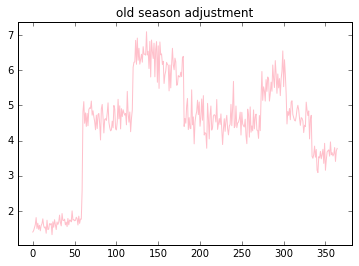

In [386]:
# In [386]
# plt.plot(panel_village_HH_load.mean(0).sum(1))
plt.plot(panel_village_shop_load.mean(0).sum(1),color='pink')
plt.title('old season adjustment')
plt.ylabel('kwh/day')
# plt.plot(panel_village_total_load.mean(0).sum(1))

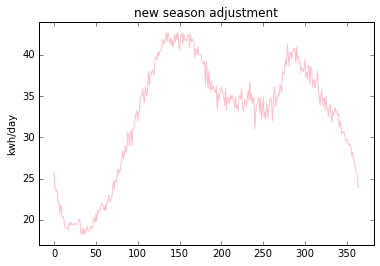

In [106]:
# In [106]
plt.plot(panel_village_total_load.mean(0).sum(1),color='pink')
plt.ylabel('kwh/day')
plt.title('new season adjustment')

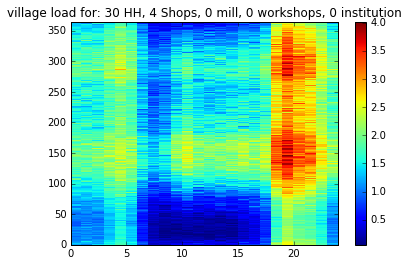

In [94]:
# In [94]
%matplotlib inline
plt.pcolor(panel_village_total_load.mean(0))
plt.title('village load for: 30 HH, 4 Shops, 0 mill, 0 workshops, 0 institution')
plt.colorbar()

In [214]:
village_total_load,df_village_HH_load,df_village_shop_load,df_village_mill_load,df_village_institution_load,dfHouse_load,dfShop_load,dfMill_load,dfWorkshop_load,dfInstitution_load = village_load_simulation().village_total_load()

village load for: 100 HH, 20 Shops, 0 mill, 0 workshops, 0 institution


In [ ]:
plt.plot(village_total_load.sum(1))


In [107]:
village_total_load,df_village_HH_load,df_village_shop_load,df_village_mill_load,df_village_institution_load,dfHouse_load,dfShop_load,dfMill_load,dfWorkshop_load,dfInstitution_load = village_load_simulation().village_HH_load()


ValueError: need more than 7 values to unpack

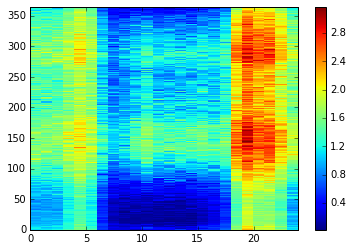

In [117]:
plt.pcolor(df_village_no_of_fan*35/1000+df_village_no_of_mobile*5/1000+df_village_no_of_light*5/1000)
plt.colorbar()

In [108]:
# df_village_shop_load, df_village_no_of_light,df_village_no_of_fan, df_village_no_of_mobile,df_village_no_of_laptop,df_village_no_of_fridge, dfShop_load= village_load_simulation().village_shop_load()
df_village_HH_load, df_village_no_of_light, df_village_no_of_mobile, df_village_no_of_fan,df_village_no_of_laptop,df_village_no_of_fridge, dfHouse_load = village_load_simulation().village_HH_load()
# df_village_mill_load,df_village_no_of_mill_engine_running,dfMill_load = village_load_simulation().village_mill_load()

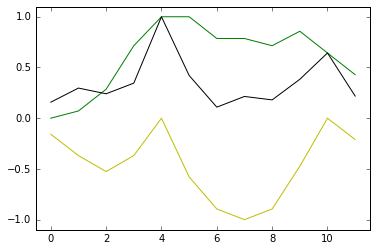

In [9]:
%matplotlib inline
# data from http://www.worldweatheronline.com/bahraich-weather-averages/uttar-pradesh/in.aspx
high = [19,19,21,27,30,29,23,24,23,29,28,25]  # temp
low =  [8,10,13,20,25,25,26,24,23,22,17,14] # temp
rain = np.array([6, 10, 13, 10,3,14,20,22,20,12,3,7]) # no. of days of rain in a month
average = np.array(map(lambda x: x/2, map(add, high, low)))
t = map(lambda x: (x-float(average.min()))/(average.max()-average.min()),average)
r = map(lambda x: -(x-float(rain.min()))/(rain.max()-rain.min()),rain)
# r = map(lambda x: np.random.binomial(30,(x/30.0),1)/30.0,rain)
plt.plot(t,color='g')
plt.plot(r,color='y')

season_fan_factor = map(lambda x: abs(x),map(add,t,r))
plt.plot(season_fan_factor,color='black')
# print season_fan_factor



In [67]:
a

[0.0,
 0.07142857142857142,
 0.2857142857142857,
 0.7142857142857143,
 1.0,
 1.0,
 0.7857142857142857,
 0.7857142857142857,
 0.7142857142857143,
 0.8571428571428571,
 0.6428571428571429,
 0.42857142857142855]

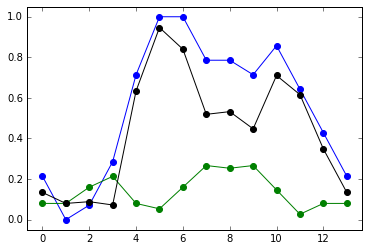

In [129]:
# In [101]
high = [22,19,19,21,27,30,29,23,24,23,29,28,25,22]  # temp
low =  [11,8,10,13,20,25,25,26,24,23,22,17,14,11] # temp
rain = np.array([6,6, 10, 13, 10,3,14,20,22,20,12,3,7,6]) # no. of days of rain in a month
average = np.array(map(lambda x: x/2, map(add, high, low)))
rain_influence_factor = 0.4
t = map(lambda x: (x-float(average.min()))/(average.max()-average.min()),average)
# r = map(lambda x: -(x-float(rain.min()))/(rain.max()-rain.min()),rain)
r = map(lambda x: -(np.random.binomial(30,(x/30.0),1)/30.0)*rain_influence_factor,rain)
p_rain = map(lambda x: -x,r)
temp_only_adj_factor = t
season_fan_factor = map(lambda x: abs(x[0]),map(add,t,r))
season_fan_factor_midday_of_month = [0,
                                    0+14, #         January	31
                                    31+14,#        February	28*
                                    58+14,#         March	31
                                    90+14,#         April	30
                                    119+14,#         May	31
                                    150+14,#         June	30
                                    180+14,#         July	31
                                    211+14,#         August	31
                                    242+14,#         September	30
                                    272+14,#         October	31
                                    303+14,#         November	30
                                    334+14,#         December	31
                                    364]
daily_season_fan_factor = scipy.interp(range(0,365),season_fan_factor_midday_of_month,season_fan_factor)
daily_temp_only_adj_factor = scipy.interp(range(0,365),season_fan_factor_midday_of_month,temp_only_adj_factor)
# plt.plot(daily_season_fan_factor,marker='o',color='black')
# plt.plot(daily_temp_only_adj_factor)
plt.plot(t,marker='o')
plt.plot(p_rain,marker='o')
plt.plot(season_fan_factor,marker='o',color='black')

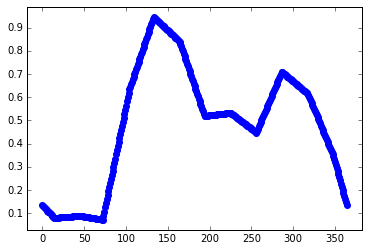

In [132]:
# In [132]
# plt.scatter(season_fan_factor_midday_of_month,season_fan_factor,marker = 'o',color='red')
plt.plot(scipy.interp(range(0,365),season_fan_factor_midday_of_month,season_fan_factor),marker='o')
# plt.plot(scipy.interpolate.UnivariateSpline(season_fan_factor_midday_of_month,season_fan_factor),marker='o')


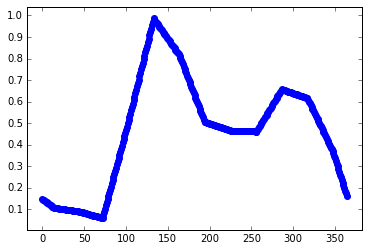

In [128]:
plt.scatter(season_fan_factor_midday_of_month,season_fan_factor,marker = 'o',color='red')
plt.plot(scipy.interp(range(0,365),season_fan_factor_midday_of_month,season_fan_factor),marker='o')
# plt.plot(scipy.interpolate.UnivariateSpline(season_fan_factor_midday_of_month,season_fan_factor),marker='o')



In [65]:
yinterp = scipy.interpolate.UnivariateSpline(season_fan_factor_midday_of_month,season_fan_factor,s=0.1)
plt.plot(season_fan_factor_midday_of_month,season_fan_factor)
plt.plot(range(0,365),yinterp(range(0,365)))



AttributeError: 'module' object has no attribute 'interpolate'

In [37]:
a = [0.0,
 0.071428571428571425,
 0.2857142857142857,
 0.7142857142857143,
 1.0,
 1.0,
 0.7857142857142857,
 0.7857142857142857,
 0.7142857142857143,
 0.8571428571428571,
 0.6428571428571429,
 0.42857142857142855]


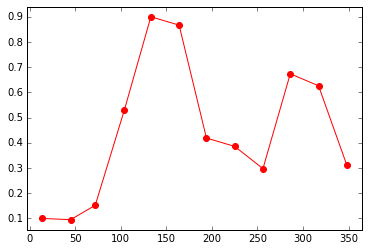

In [66]:
plt.plot(season_fan_factor_midday_of_month,season_fan_factor,marker = 'o',color='red')




0.0


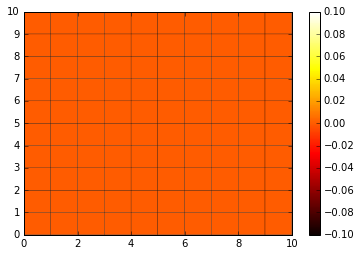

In [121]:
from IPython.html.widgets import *
%matplotlib inline
village = pd.DataFrame(np.zeros((10,10)))

def pltday(d,t):
    for hh in range(0,50):
        v = dfHouse_load[hh][t][d]
        village[0][hh] = v*10
    print village[0][0]
    plt.pcolor(village,edgecolor='k',cmap='hot')
    plt.colorbar()
#     plt.title(d,t)


interact(pltday, d=(0,364,1),t=(0,23,1))

In [104]:
%pylab inline
from tempfile import NamedTemporaryFile

VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.mp4') as f:
            anim.save(f.name, fps=20, extra_args=['-vcodec', 'libx264'])
            video = open(f.name, "rb").read()
        anim._encoded_video = video.encode("base64")
    
    return VIDEO_TAG.format(anim._encoded_video)
from IPython.display import HTML

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

# call our new function to display the animation
display_animation(anim)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


ValueError: Cannot save animation: no writers are available. Please install mencoder or ffmpeg to save animations.

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.276890,0.281370,0.286575,0.358565,0.423450,0.357790,0.158715,0.053410,0.026530,0.026805,...,0.026050,0.064315,0.096405,0.175025,0.451455,0.595275,0.518045,0.501635,0.423095,0.283095
1,0.277415,0.282560,0.286310,0.358325,0.423485,0.355765,0.158500,0.052095,0.026325,0.026470,...,0.026345,0.063855,0.097835,0.173820,0.450870,0.596475,0.519515,0.502515,0.424265,0.283200
2,0.275510,0.281795,0.286865,0.358390,0.423320,0.358780,0.157580,0.051880,0.026100,0.026155,...,0.025665,0.063720,0.098065,0.174695,0.450395,0.596525,0.518200,0.502315,0.425865,0.283120
3,0.276425,0.283000,0.285380,0.358675,0.425275,0.357365,0.158685,0.053565,0.026395,0.026530,...,0.025765,0.063895,0.096565,0.174715,0.450005,0.595985,0.517670,0.503050,0.425520,0.283290
4,0.275470,0.281175,0.286070,0.358165,0.422905,0.357525,0.158190,0.053370,0.026750,0.026655,...,0.026335,0.063640,0.096320,0.174900,0.452030,0.596280,0.520005,0.501815,0.423805,0.281535
5,0.276785,0.281880,0.287345,0.357680,0.423120,0.357925,0.158080,0.052870,0.026205,0.026310,...,0.026090,0.063705,0.096090,0.173585,0.451630,0.596195,0.518495,0.502225,0.425530,0.282625
6,0.276330,0.281765,0.285865,0.357990,0.424235,0.356895,0.158945,0.053340,0.026400,0.026275,...,0.025805,0.063465,0.097410,0.173795,0.451535,0.594920,0.517235,0.502210,0.424420,0.282420
7,0.274750,0.282855,0.287725,0.358635,0.422865,0.356875,0.157580,0.053445,0.026855,0.026950,...,0.026545,0.064305,0.097515,0.175025,0.450740,0.595255,0.518390,0.501330,0.424240,0.282695
8,0.276050,0.281015,0.286480,0.358375,0.423380,0.357040,0.157900,0.052785,0.026645,0.026540,...,0.026075,0.064245,0.098280,0.173195,0.452135,0.596295,0.518185,0.501095,0.426715,0.283160
9,0.276590,0.280745,0.286125,0.357445,0.423285,0.356405,0.157350,0.053390,0.026085,0.026325,...,0.026235,0.064005,0.097365,0.175385,0.452790,0.596555,0.519800,0.501290,0.424915,0.282725


In [50]:
panel_village_total_load_2 = panel_village_total_load
panel_village_HH_load_2 = panel_village_HH_load
dict_of_df_village_shop_load_2 = dict_of_df_village_shop_load
dict_of_df_village_mill_load_2 = dict_of_df_village_mill_load
dict_of_df_village_institution_load_2 = dict_of_df_village_institution_load

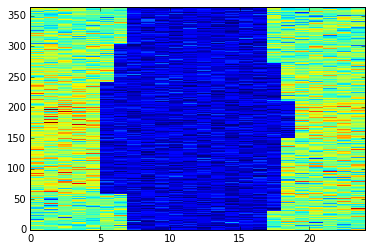

In [33]:
import time, sys
from IPython.core.display import clear_output
f, ax = plt.subplots()

for i in range(0,3):
    b = 
    ax.pcolor(b)
    time.sleep(0.1)
    clear_output()
    display(f)
    ax.cla() # turn this off if you'd like to "build up" plots
plt.close()

          0         1         2         3         4
0  0.349681  0.716521  0.841806  0.388965  0.493326
1  0.157953  0.269319  0.691950  0.297558  0.005885
2  0.845446  0.847794  0.038917  0.448228  0.072749
3  0.738188  0.242101  0.756828  0.449988  0.795379
4  0.597652  0.598619  0.825635  0.301198  0.002215


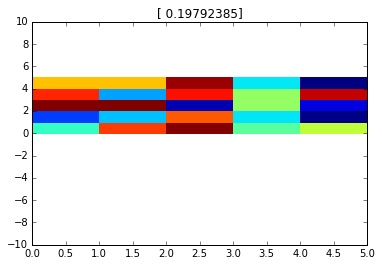

In [17]:
from IPython.html.widgets import *
%matplotlib inline
def pltsin(f):
    n = np.random.rand(5,5)
    df = pd.DataFrame(n)
    print df
    plt.pcolor(df)
    ylim(-10,10)
    plt.title(np.random.rand(1))
interact(pltsin, f=(1,10,1))

In [ ]:
'light demand but no grid'
(dfL[:] > 0) & (g[:] <= 0)
plt.pcolor((dfL[:] > 0) & (g[:] <= 0))
plt.colorbar()
plt.show()

test = (dfL[:] > 0) & (g[:] <= 0)
plt.bar(range(0,24),test.sum()/365,align='center')
plt.xticks(range(0,24))




In [ ]:
mobile_but_no_grid = []
for i in range(0,24):
    light_but_no_grid.append(((g-m)[i] == -1).sum())
print light_but_no_grid
plt.bar(range(0,24),mobile_but_no_grid)

In [ ]:
plot().grid_availability()

In [566]:
dfShop_load

{0:      0   1   2   3   4   5   6   7   8      9  ...     14     15     16  \
 0     0   0   0   0   0   0   0   0   0  0.010 ...  0.010  0.010  0.000   
 1     0   0   0   0   0   0   0   0   0  0.000 ...  0.010  0.015  0.000   
 2     0   0   0   0   0   0   0   0   0  0.000 ...  0.015  0.005  0.005   
 3     0   0   0   0   0   0   0   0   0  0.010 ...  0.010  0.010  0.000   
 4     0   0   0   0   0   0   0   0   0  0.000 ...  0.000  0.000  0.000   
 5     0   0   0   0   0   0   0   0   0  0.000 ...  0.015  0.015  0.005   
 6     0   0   0   0   0   0   0   0   0  0.005 ...  0.000  0.000  0.000   
 7     0   0   0   0   0   0   0   0   0  0.000 ...  0.000  0.000  0.000   
 8     0   0   0   0   0   0   0   0   0  0.010 ...  0.000  0.005  0.000   
 9     0   0   0   0   0   0   0   0   0  0.005 ...  0.010  0.000  0.010   
 10    0   0   0   0   0   0   0   0   0  0.000 ...  0.000  0.015  0.015   
 11    0   0   0   0   0   0   0   0   0  0.000 ...  0.000  0.010  0.000   
 12    0 

0


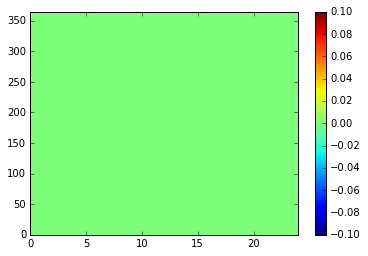

In [139]:
a,b = House().Mobile().mobile_status_for_year_for_1_house()
print a


plt.pcolor(b)
plt.colorbar()
plt.show()

%matplotlib inline

(array([ 29.,  60.,  62.,  68.,  74.,  34.,  21.,  12.,   3.,   2.]),
 array([  1. ,   1.9,   2.8,   3.7,   4.6,   5.5,   6.4,   7.3,   8.2,
          9.1,  10. ]),
 <a list of 10 Patch objects>)

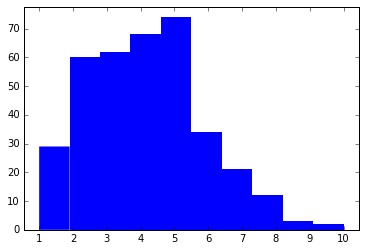

In [93]:
plt.hist(b.sum(1))

In [438]:
light_status =  [0 for i in range(0,24)]
light_status[18:23] = [1 for i in range(18,23)]
light_status

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0]

1.4142135623730951